In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
my_movies = pd.read_csv("C:\\Users\\vijay\\OneDrive\\Desktop\\Excelr\\my_movies.csv")
my_movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
df=pd.get_dummies(my_movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [5]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P..."
1393,0.1,"(V2_LOTR1, V1_Sixth Sense, Green Mile, Sixth S..."
1394,0.1,"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P..."
1395,0.1,"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P..."


In [6]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(V5_LOTR2),"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(LOTR1),"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(V4_Green Mile),"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V3_Harry Potter1),"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [7]:
rules.sort_values('lift',ascending = True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
667,(Gladiator),"(V1_Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
666,"(V1_Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
1724,"(Sixth Sense, V1_Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
720,"(V1_Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
45,(V1_Sixth Sense),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
44,(Gladiator),(V1_Sixth Sense),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
218,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
3615,"(V1_Sixth Sense, Green Mile, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
6317,(Gladiator),"(Sixth Sense, V1_Sixth Sense, Green Mile, V4_G...",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
230,(Gladiator),"(Sixth Sense, V1_Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333


In [8]:
rules.sort_values('lift',ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V5_LOTR2, LOTR1, Green Mile, V3_Harry Potter1)","(LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(LOTR2, V5_LOTR2, LOTR1)","(V2_LOTR1, Sixth Sense, V4_Green Mile, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V2_LOTR1, V5_LOTR2, V4_Green Mile)","(LOTR2, Sixth Sense, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V2_LOTR1, V5_LOTR2, LOTR2)","(Sixth Sense, LOTR1, V4_Green Mile, Harry Pott...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V2_LOTR1, LOTR1, V4_Green Mile)","(LOTR2, Sixth Sense, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V2_LOTR1, LOTR1, LOTR2)","(Sixth Sense, V5_LOTR2, V4_Green Mile, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V2_LOTR1, V4_Green Mile, LOTR2)","(Sixth Sense, V5_LOTR2, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(Sixth Sense, V5_LOTR2, Harry Potter1)","(V2_LOTR1, LOTR1, V4_Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Sixth Sense, LOTR1, Harry Potter1)","(V2_LOTR1, V5_LOTR2, V4_Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(Sixth Sense, V4_Green Mile, Harry Potter1)","(V2_LOTR1, V5_LOTR2, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [9]:
rules.sort_values('lift',ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
667,(Gladiator),"(V1_Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
666,"(V1_Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
1724,"(Sixth Sense, V1_Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
720,"(V1_Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
45,(V1_Sixth Sense),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
44,(Gladiator),(V1_Sixth Sense),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
218,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
3615,"(V1_Sixth Sense, Green Mile, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
6317,(Gladiator),"(Sixth Sense, V1_Sixth Sense, Green Mile, V4_G...",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
230,(Gladiator),"(Sixth Sense, V1_Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333


In [10]:
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V5_LOTR2, LOTR1, Green Mile, V3_Harry Potter1)","(LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(LOTR2, V5_LOTR2, LOTR1)","(V2_LOTR1, Sixth Sense, V4_Green Mile, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V2_LOTR1, V5_LOTR2, V4_Green Mile)","(LOTR2, Sixth Sense, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V2_LOTR1, V5_LOTR2, LOTR2)","(Sixth Sense, LOTR1, V4_Green Mile, Harry Pott...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V2_LOTR1, LOTR1, V4_Green Mile)","(LOTR2, Sixth Sense, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V2_LOTR1, LOTR1, LOTR2)","(Sixth Sense, V5_LOTR2, V4_Green Mile, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V2_LOTR1, V4_Green Mile, LOTR2)","(Sixth Sense, V5_LOTR2, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(Sixth Sense, V5_LOTR2, Harry Potter1)","(V2_LOTR1, LOTR1, V4_Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Sixth Sense, LOTR1, Harry Potter1)","(V2_LOTR1, V5_LOTR2, V4_Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(Sixth Sense, V4_Green Mile, Harry Potter1)","(V2_LOTR1, V5_LOTR2, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [11]:
rules[rules.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
58,(LOTR1),(Harry Potter1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
59,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
60,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
61,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
62,(LOTR1),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
...,...,...,...,...,...,...,...,...,...
64247,(V5_LOTR2),"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64248,(LOTR1),"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
64249,(V4_Green Mile),"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
64250,(V3_Harry Potter1),"(V2_LOTR1, V1_Sixth Sense, Green Mile, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [12]:
my_movies = pd.read_csv("C:\\Users\\vijay\\OneDrive\\Desktop\\Excelr\\my_movies.csv")

In [13]:
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


<AxesSubplot:>

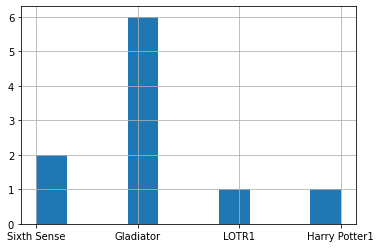

In [14]:
my_movies['V1'].hist()

<AxesSubplot:>

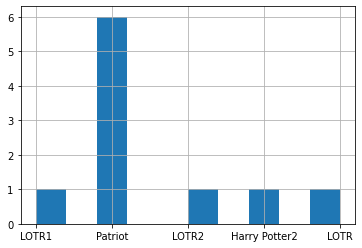

In [15]:
my_movies['V2'].hist()

<AxesSubplot:>

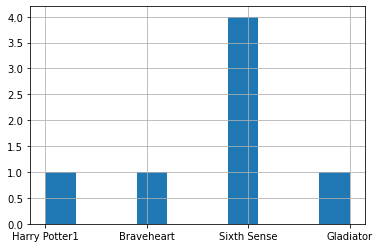

In [16]:
my_movies['V3'].hist()

<AxesSubplot:>

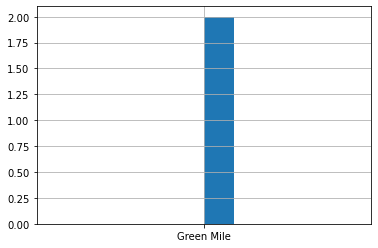

In [17]:
my_movies['V4'].hist()

<AxesSubplot:>

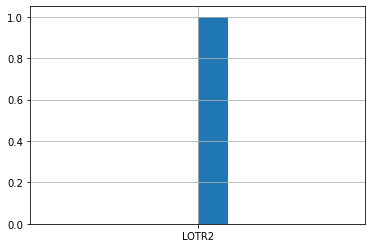

In [18]:
my_movies['V5'].hist()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

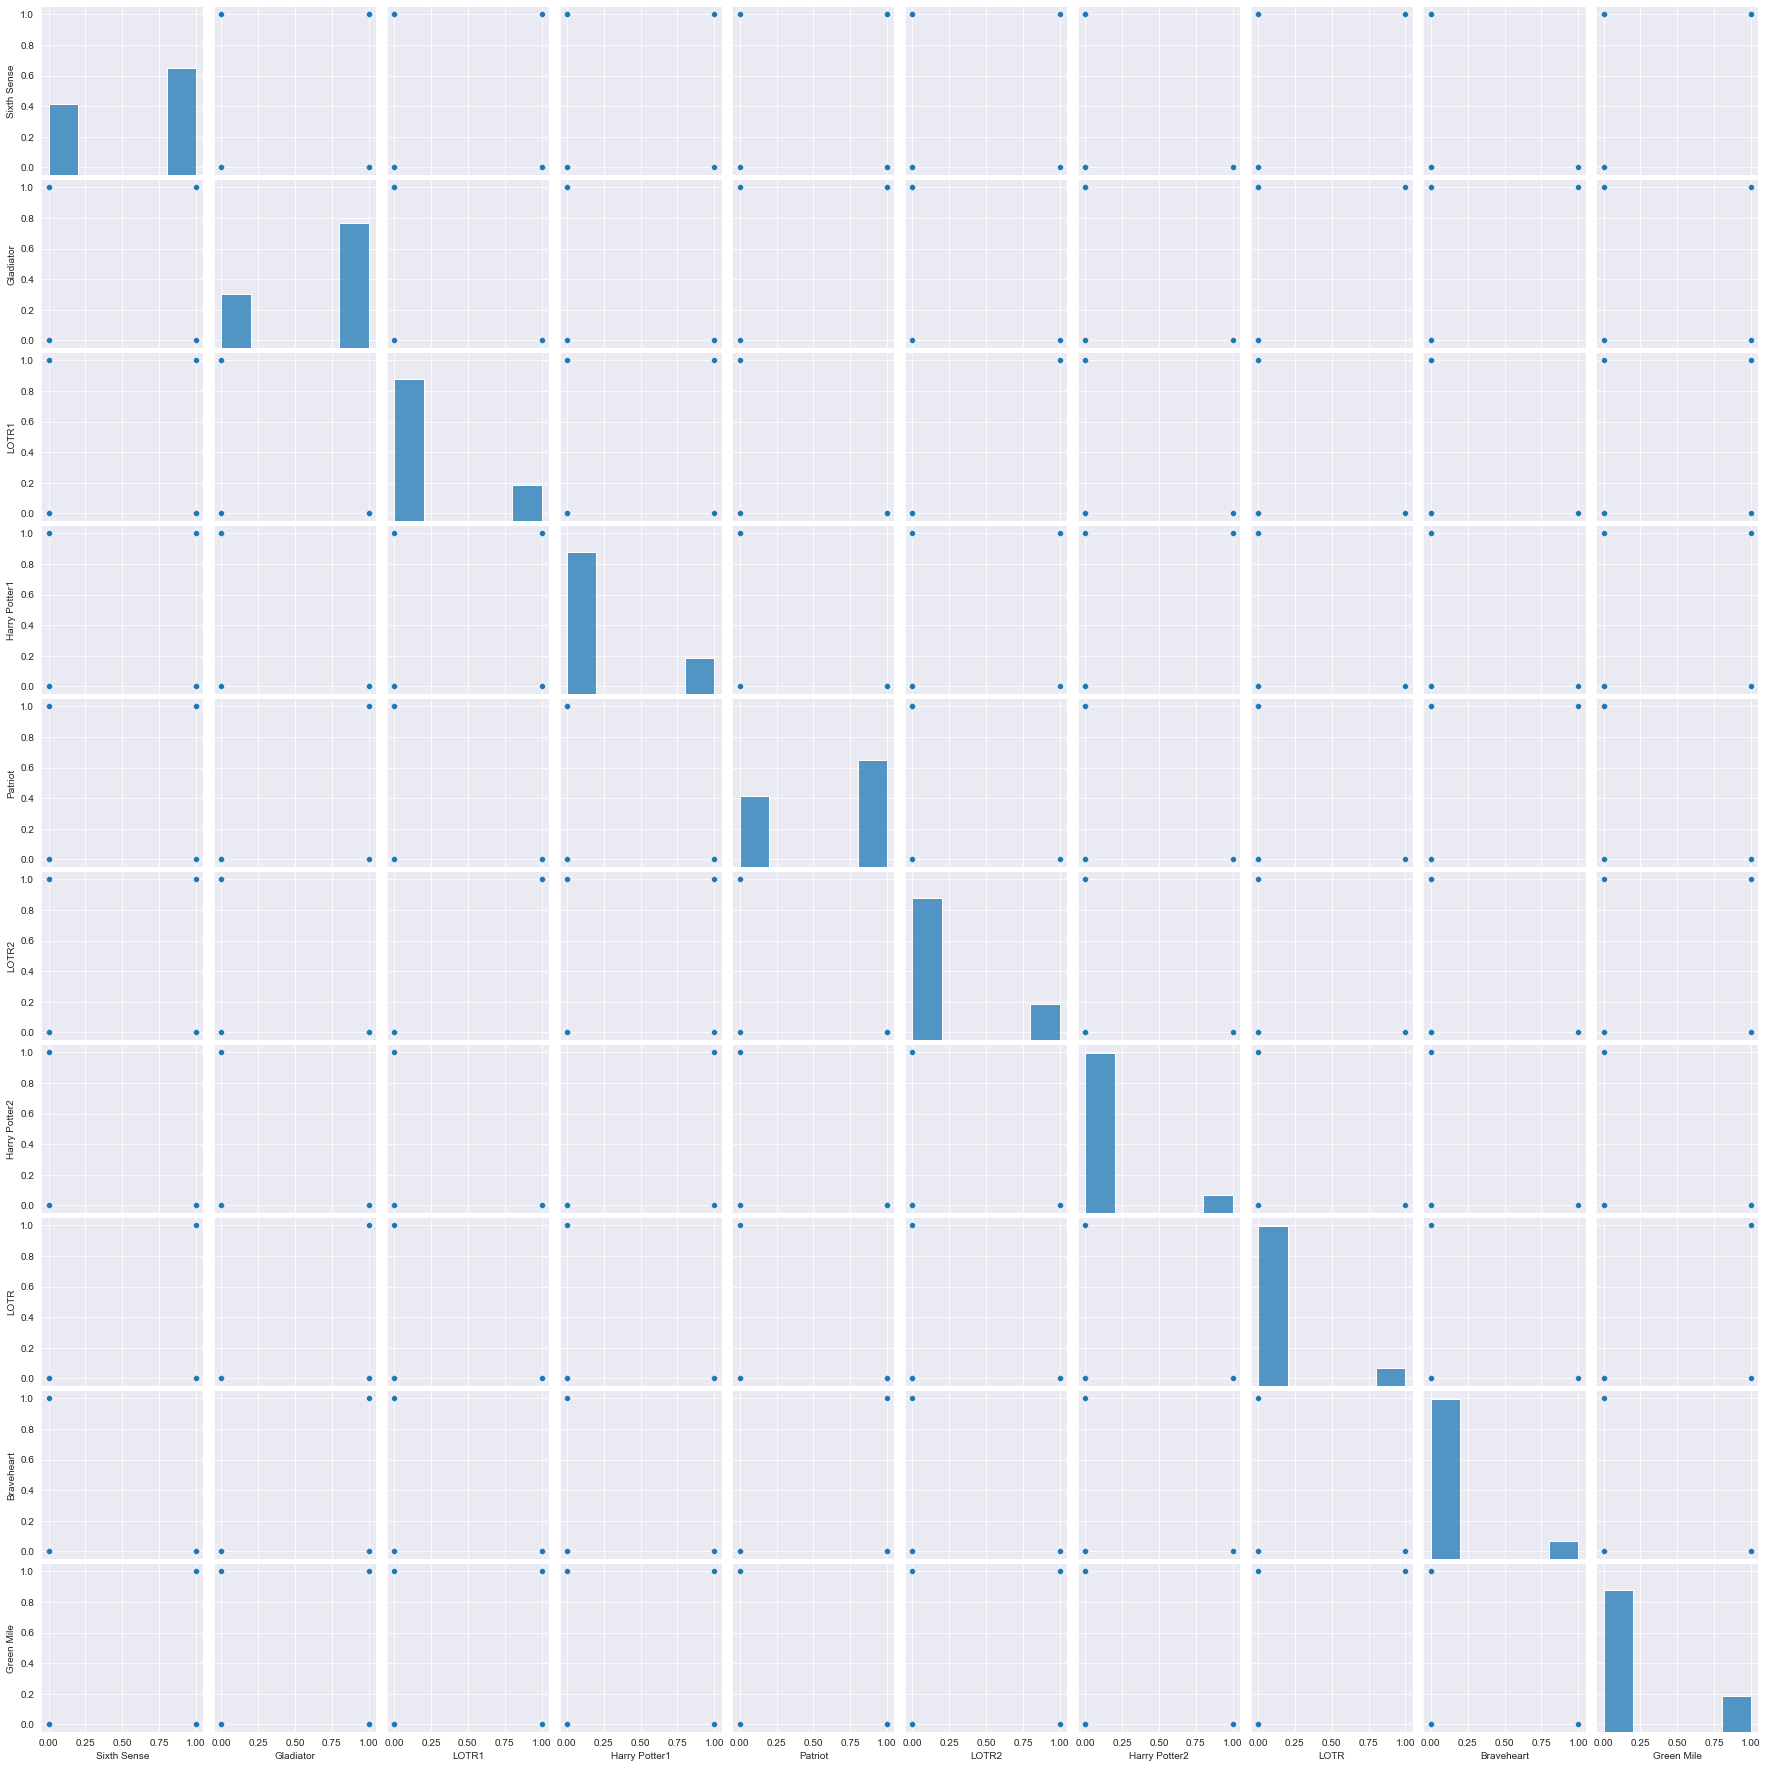

In [20]:
sns.set_style(style='darkgrid')
sns.pairplot(my_movies)

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sixth Sense', ylabel='Density'>

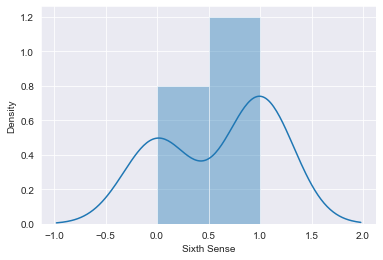

In [21]:
sns.distplot(my_movies['Sixth Sense'])

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Green Mile', ylabel='Density'>

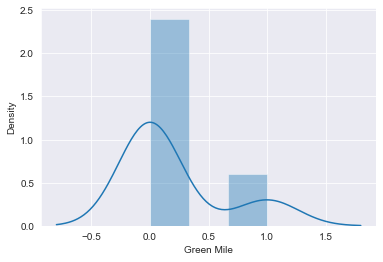

In [22]:
sns.distplot(my_movies['Green Mile'])

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gladiator', ylabel='Density'>

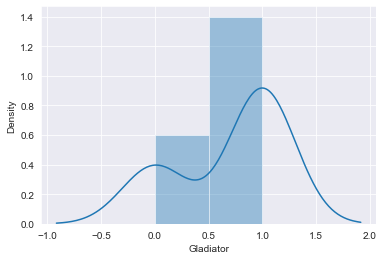

In [23]:
sns.distplot(my_movies['Gladiator'])